In [160]:
import numpy as np
import matplotlib.pyplot as plt

In [161]:
x = np.arange(-100, 100, 1, dtype=float)
y = np.arange(-100, 100, 1, dtype=float)

X, Y = np.meshgrid(x, y)

In [162]:

def generate_values(func):
    vals = np.zeros((len(x),len(y)))
    for x_i in range(0, len(x)):
        for y_i in range(0, len(y)):
            vals[x_i][y_i] = func(x[x_i], y[y_i])
    return vals

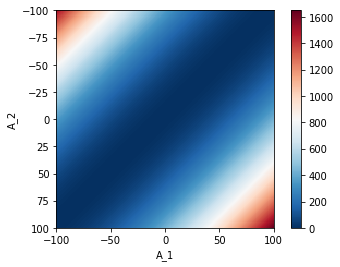

In [172]:
center = (0.2,0.2)
degree = 2

polynomial_k = lambda x_i, y_i: (x_i * center[0] + y_i * center[1] + 1)**degree

vals = generate_values(polynomial_k)
plt.imshow(vals, cmap=plt.cm.RdBu_r, extent=[-100,100,100,-100],)
plt.colorbar()
plt.ylabel("A_2")
plt.xlabel("A_1")
plt.savefig("2D_poly_k.svg")

In [173]:
sigma = 70
gauss_k = lambda x_i, y_i: np.exp(- ((x_i - center[0])**2 + (y_i - center[1])**2 ) / (2*sigma**2))

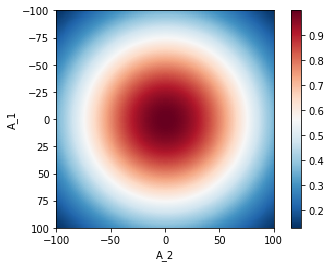

In [174]:
vals = generate_values(gauss_k)

plt.imshow(vals, cmap=plt.cm.RdBu_r, extent=[-100,100,100,-100])
plt.colorbar();
plt.ylabel("A_1")
plt.xlabel("A_2")
plt.savefig("2D_gauss_k.svg")

In [175]:
def generate_1values(func):
    vals = np.zeros(len(x))
    for x_i in range(0, len(x)):
        vals[x_i] = func(x[x_i])
    return vals

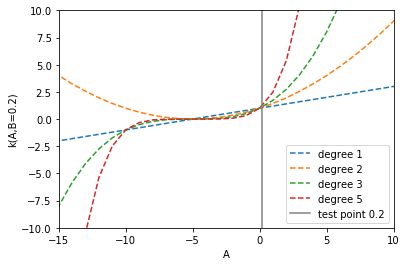

In [177]:
center = 0.2
vals = []
degrees = [1,2,3,5]
for degree in degrees:
    polynomial_k = lambda x_i: (x_i * center + 1)**degree
    vals.append(generate_1values(polynomial_k))

for i in range(len(vals)):
    plt.plot(x, vals[i], label=f"degree {degrees[i]}", linestyle="--")
plt.xlim(-15,10)
plt.ylim(-10, 10)
plt.axvline(x=0.2, c="gray", label="test point 0.2")
plt.legend()
plt.ylabel("k(A,B=0.2)")
plt.xlabel("A")
plt.savefig("1D_poly_k.svg")

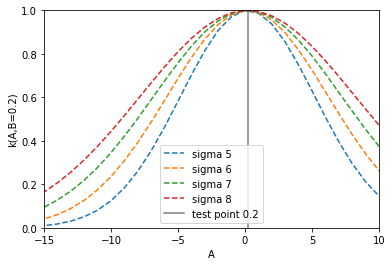

In [178]:
center = 0.2

gauss_k = lambda x_i: np.exp(- (x_i - center)**2 / (2*sigma**2))
vals = []

sigmas = [5,6,7,8]
for sigma in sigmas:
    gauss_k = lambda x_i: np.exp(- (x_i - center)**2 / (2*sigma**2))
    vals.append(generate_1values(gauss_k))


for i in range(len(vals)):
    plt.plot(x, vals[i], label=f"sigma {sigmas[i]}", linestyle="--")
plt.xlim(-15,10)
plt.ylim(0, 1)
plt.axvline(x=0.2, c="gray", label="test point 0.2")
plt.legend()
plt.ylabel("k(A,B=0.2)")
plt.xlabel("A")
plt.savefig("1D_gauss_k.svg")